#### Deep Learning Jump Start with Azure Databricks

##### Problem Statement:
###### Build and Train a Deep Convolution Network to Classify Images in the CIFAR10 dataset using Keras on Azure Databricks
<br>
##### The CIFAR-10 dataset:
The CIFAR-10 dataset consists of **60000 32x32** colour images in **10 classes**, with **6000** images per class. There are **50000** training images and **10000** test images. 
<br>
###### Image Classes Example
![N|Solid](https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/CIFAR10.png?raw=true)

<br>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200"/>
##### **Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
* In this Technical Lab we will use Tensorflow as the backend for Keras

Keras is one of the leading frameworks to build deep learning models, It

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

##### Step 1 - Library Import & general setup
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers
* Matplotlib

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.

###### Validate GPU accessibility

In [5]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

###### Define Function to plot training metrics

In [7]:
def plotmetrics(history):
  width = 10
  height = 5
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

###### Initial Parameter Setup

In [9]:
batch_size = 32
num_classes = 10
epochs = 25

##### Step 2 - Load and process CIFAR 10 Dataset

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

In [12]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

##### Step 3 - Define Convolution Network

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [15]:
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_9 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_13 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_10 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_14 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_7 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_11 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_15 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_12 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_16 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_8 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_3 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_5 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_17 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_9 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_6 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_18 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

##### Step 4 - Define Optimizers and Compile the model

In [17]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Step 5 - Model Training : without Data Augmentation (Takes 5-8 Mins)

In [19]:
from keras.callbacks import History 
history = History()
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history],
         verbose=2)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 17s - loss: 0.7172 - acc: 0.7554 - val_loss: 0.6861 - val_acc: 0.7657
Epoch 2/25
 - 16s - loss: 0.7107 - acc: 0.7596 - val_loss: 0.6888 - val_acc: 0.7727
Epoch 3/25
 - 16s - loss: 0.6990 - acc: 0.7633 - val_loss: 0.6638 - val_acc: 0.7729
Epoch 4/25
 - 16s - loss: 0.6942 - acc: 0.7621 - val_loss: 0.6448 - val_acc: 0.7838
Epoch 5/25
 - 16s - loss: 0.6876 - acc: 0.7672 - val_loss: 0.6889 - val_acc: 0.7689
Epoch 6/25
 - 16s - loss: 0.6825 - acc: 0.7688 - val_loss: 0.6440 - val_acc: 0.7818
Epoch 7/25
 - 16s - loss: 0.6767 - acc: 0.7704 - val_loss: 0.6412 - val_acc: 0.7846
Epoch 8/25
 - 16s - loss: 0.6659 - acc: 0.7741 - val_loss: 0.6260 - val_acc: 0.7896
Epoch 9/25
 - 16s - loss: 0.6675 - acc: 0.7743 - val_loss: 0.6318 - val_acc: 0.7920
Epoch 10/25
 - 16s - loss: 0.6645 - acc: 0.7745 - val_loss: 0.6890 - val_acc: 0.7816
Epoch 11/25
 - 16s - loss: 0.6562 - acc: 0.7763 - val_loss: 0.6446 - val_acc: 0.7878
Epoch 12/25
 - 16s - loss: 0.6516 - acc: 0.7812 - val_loss: 0.6440 - val_acc: 0.7870
Epoch 13/25
 - 16s - loss: 0.6524 - acc: 0.7791 - val_loss: 0.6293 - val_acc: 0.7920
Epoch 14/25
 - 16s - loss: 0.6447 - acc: 0.7837 - val_loss: 0.7013 - val_acc: 0.7819
Epoch 15/25
 - 16s - loss: 0.6418 - acc: 0.7839 - val_loss: 0.6471 - val_acc: 0.7882
Epoch 16/25
 - 16s - loss: 0.6398 - acc: 0.7852 - val_loss: 0.6578 - val_acc: 0.7858
Epoch 17/25
 - 16s - loss: 0.6387 - acc: 0.7847 - val_loss: 0.6870 - val_acc: 0.7739
Epoch 18/25
 - 16s - loss: 0.6343 - acc: 0.7853 - val_loss: 0.6589 - val_acc: 0.7829
Epoch 19/25
 - 16s - loss: 0.6298 - acc: 0.7894 - val_loss: 0.6395 - val_acc: 0.7868
Epoch 20/25
 - 16s - loss: 0.6306 - acc: 0.7889 - val_loss: 0.6432 - val_acc: 0.7890
Epoch 21/25
 - 16s - loss: 0.6272 - acc: 0.7909 - val_loss: 0.6345 - val_acc: 0.7913
Epoch 22/25
 - 16s - loss: 0.6242 - acc: 0.7897 - val_loss: 0.6670 - val_acc: 0.7832
Epoch 23/25
 - 16s - loss: 0.6233 - acc: 0.7914 - val_loss: 0.6826 - val_acc: 0.7901
Epoch 24/25
 - 16s - loss: 0.6283 - acc: 0.7896 - val_loss: 0.6632 - val_acc: 0.7823
Epoch 25/25
 - 16s - loss: 0.6235 - acc: 0.7910 - val_loss: 0.6370 - val_acc: 0.7937
Out[35]: <keras.callbacks.History at 0x7fbe4422e9e8>

###### Evaluate the model (to Get final test accuracy and loss)

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.615
Test loss: 1.0855931102752685

##### Step 6 - Model Training with Data Augmentation (Takes 5-10 Minutes)

In [23]:
from keras.callbacks import History 
history = History()
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                     callbacks=[history],
                   verbose =2)

Using real-time data augmentation.
Epoch 1/25
 - 19s - loss: 1.2073 - acc: 0.5747 - val_loss: 1.1324 - val_acc: 0.6058
Epoch 2/25
 - 18s - loss: 1.1621 - acc: 0.5900 - val_loss: 0.9985 - val_acc: 0.6485
Epoch 3/25
 - 19s - loss: 1.1185 - acc: 0.6052 - val_loss: 1.0586 - val_acc: 0.6303
Epoch 4/25
 - 19s - loss: 1.0842 - acc: 0.6186 - val_loss: 0.9790 - val_acc: 0.6533
Epoch 5/25
 - 19s - loss: 1.0610 - acc: 0.6279 - val_loss: 0.9302 - val_acc: 0.6681
Epoch 6/25
 - 18s - loss: 1.0342 - acc: 0.6369 - val_loss: 0.9500 - val_acc: 0.6632
Epoch 7/25
 - 19s - loss: 1.0089 - acc: 0.6476 - val_loss: 0.9279 - val_acc: 0.6751
Epoch 8/25
 - 19s - loss: 0.9881 - acc: 0.6530 - val_loss: 0.8654 - val_acc: 0.7035
Epoch 9/25
 - 19s - loss: 0.9756 - acc: 0.6600 - val_loss: 0.8110 - val_acc: 0.7160
Epoch 10/25
 - 18s - loss: 0.9510 - acc: 0.6659 - val_loss: 0.8643 - val_acc: 0.7001
Epoch 11/25
 - 19s - loss: 0.9397 - acc: 0.6714 - val_loss: 0.7989 - val_acc: 0.7224
Epoch 12/25
 - 19s - loss: 0.9293 - acc: 0.6773 - val_loss: 0.8589 - val_acc: 0.7072
Epoch 13/25
 - 19s - loss: 0.9133 - acc: 0.6799 - val_loss: 0.7805 - val_acc: 0.7309
Epoch 14/25
 - 19s - loss: 0.9045 - acc: 0.6885 - val_loss: 0.8497 - val_acc: 0.7139
Epoch 15/25
 - 19s - loss: 0.8971 - acc: 0.6885 - val_loss: 0.7412 - val_acc: 0.7439
Epoch 16/25
 - 19s - loss: 0.8871 - acc: 0.6927 - val_loss: 0.7844 - val_acc: 0.7313
Epoch 17/25
 - 19s - loss: 0.8777 - acc: 0.6941 - val_loss: 0.7544 - val_acc: 0.7422
Epoch 18/25
 - 19s - loss: 0.8709 - acc: 0.6974 - val_loss: 0.7803 - val_acc: 0.7327
Epoch 19/25
 - 19s - loss: 0.8694 - acc: 0.7014 - val_loss: 0.7441 - val_acc: 0.7478
Epoch 20/25
 - 19s - loss: 0.8586 - acc: 0.7057 - val_loss: 0.7487 - val_acc: 0.7460
Epoch 21/25
 - 19s - loss: 0.8591 - acc: 0.7051 - val_loss: 0.7437 - val_acc: 0.7479
Epoch 22/25
 - 19s - loss: 0.8488 - acc: 0.7100 - val_loss: 0.7264 - val_acc: 0.7533
Epoch 23/25
 - 19s - loss: 0.8451 - acc: 0.7097 - val_loss: 0.7396 - val_acc: 0.7538
Epoch 24/25
 - 19s - loss: 0.8372 - acc: 0.7140 - val_loss: 0.7819 - val_acc: 0.7339
Epoch 25/25
 - 19s - loss: 0.8385 - acc: 0.7124 - val_loss: 0.7721 - val_acc: 0.7414
Out[29]: <keras.callbacks.History at 0x7fbe44313748>

###### Evaluate the model (to Get final test accuracy and loss)

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7414
Test loss: 0.7721065317153931

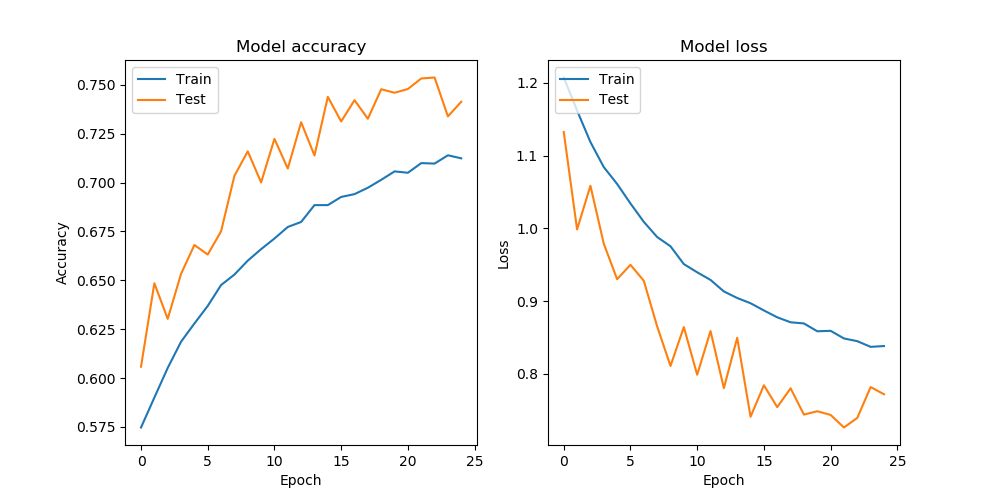

In [26]:
pltoutput = plotmetrics(history)
display(pltoutput)